In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
dt = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
dt

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# pd.set_option('display.max_columns',None)
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
   dt.shape

(7043, 21)

In [7]:
dt.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
dt.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
dt.TotalCharges  = pd.to_numeric(dt.TotalCharges , errors = 'coerce')
dt.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# import missingno as msno
# msno.matrix(dt)

In [11]:
dt.dropna(inplace = True)
df2 = dt.iloc[:,1:]
df2['Churn'].replace(to_replace = 'Yes', value =1,inplace =True)
df2['Churn'].replace(to_replace = 'No', value =0,inplace =True)
df_dummies = pd.get_dummies(df2)  #change categorical variable to numerical variable
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

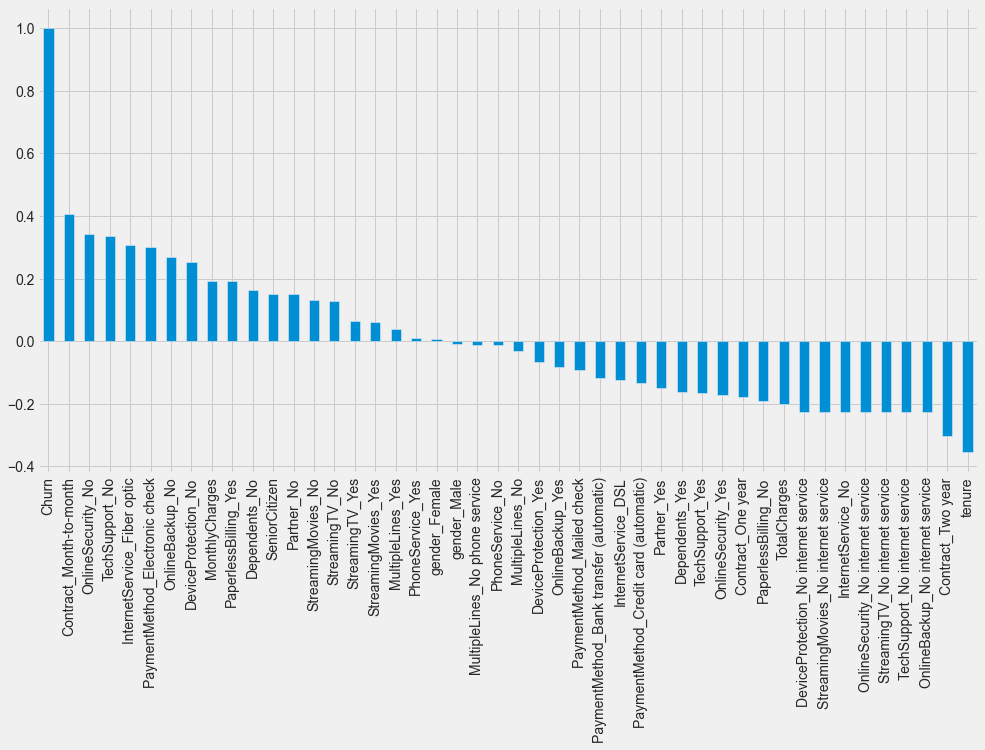

In [12]:
plt.figure(figsize = (15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False). plot(kind = 'bar')

In [13]:
# Data exploration


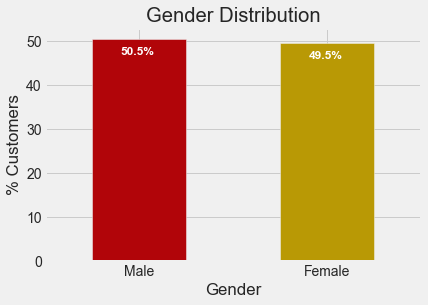

In [14]:
colors = ['#B10509','#B99905']
ax = (dt['gender'].value_counts()*100.0/len(dt)).plot(kind = 'bar', stacked = True, rot = 0,color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
# ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')


totals = []

for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)


for i in ax.patches:
    ax.text(i.get_x() + .15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1)) + '%',fontsize = 12, color = 'white', weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

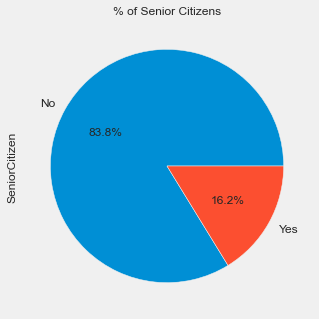

In [15]:
ax = (dt['SeniorCitizen'].value_counts()*100.0 / len(dt)) \
.plot.pie(autopct = '%.1f%%', labels = ['No', 'Yes'], figsize = (5,5), fontsize = 12)
ax.set_ylabel('SeniorCitizen', fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

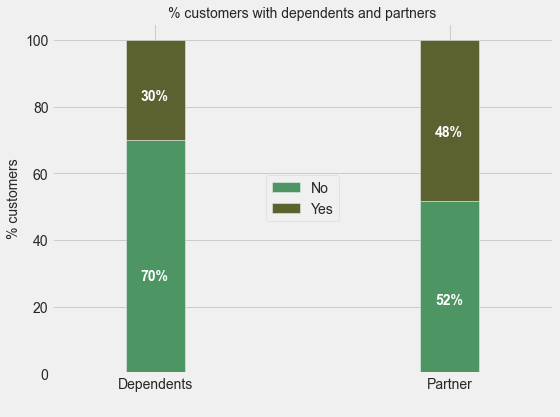

In [16]:
df2 = pd.melt(dt, id_vars = ['customerID'], value_vars = ['Dependents', 'Partner'])
df3 = df2.groupby(['variable' , 'value']).count().unstack()
df3 = df3*100/len(dt)
colors  = ['#4D9663', '#5B6230']
ax = df3.loc[:,'customerID'].plot.bar(stacked = True, color = colors,figsize = (8,6), rot = 0,width = 0.2)

ax.set_ylabel('% customers', size = 14)
ax.set_xlabel(' ')
ax.set_title('% customers with dependents and partners', size = 14)
ax.legend(loc ='center',prop = {'size' : 14})

for p in ax.patches:
    width,height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25*width, p.get_y() + .4*height),color = 'white', weight = 'bold', size = 14)

In [17]:
# customer account information
# 

C:\Users\Ankur Mishra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of customers by their tenure')

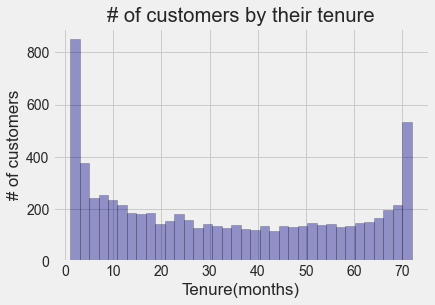

In [18]:
ax= sns.distplot(dt['tenure'],hist = True, kde = False,bins = int(180/5),color = 'darkblue', hist_kws = {'edgecolor' : 'black'},kde_kws = {'lineweight':4})

ax.set_ylabel('# of customers')
ax.set_xlabel('Tenure(months)')
ax.set_title('# of customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

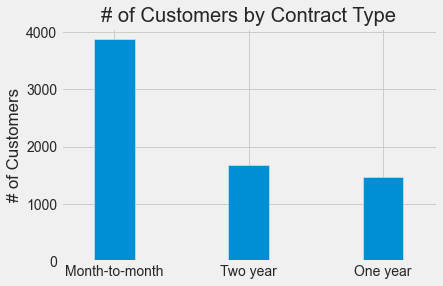

In [19]:
ax =  dt['Contract'].value_counts().plot(kind = 'bar',rot = 0, width  = 0.3)

ax.set_ylabel('# of Customers')

ax.set_title('# of Customers by Contract Type')

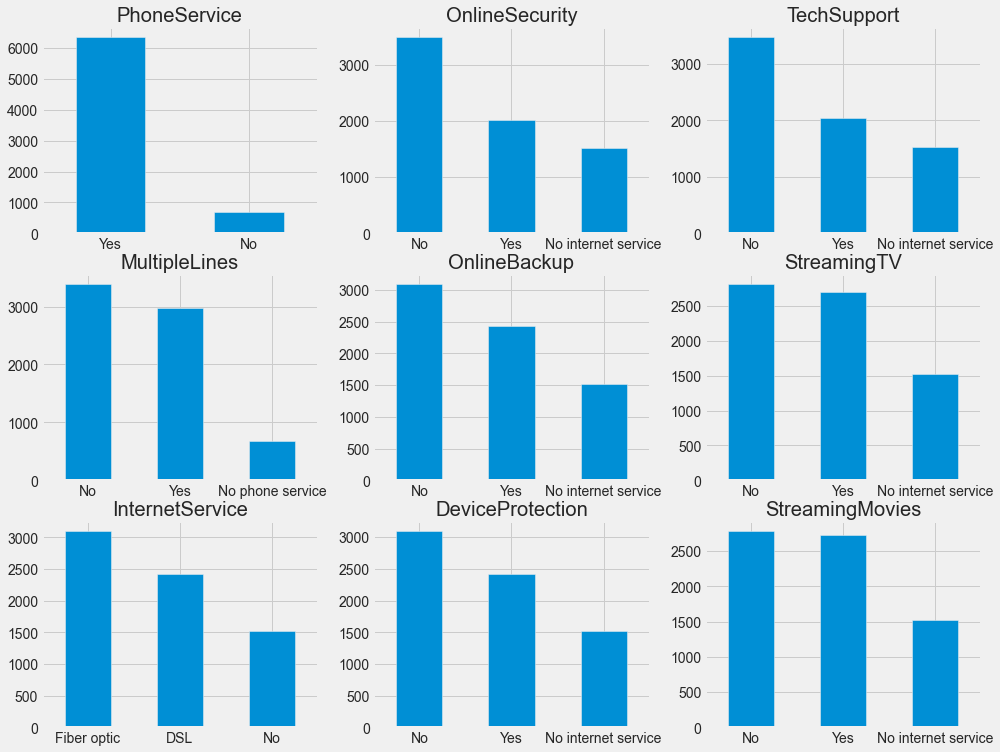

In [20]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (15,12)) 
for i, item in enumerate(services):
    if i < 3: 
        ax= dt[item].value_counts().plot(kind ='bar', ax= axes[i,0], rot = 0)
    elif i >=3 and i < 6:
        ax = dt[item].value_counts().plot(kind ='bar', ax=axes[i-3,1], rot = 0)

    elif i < 9:
        ax= dt[item].value_counts().plot(kind = 'bar', ax=axes[i-6,2], rot = 0)
    ax.set_title(item)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

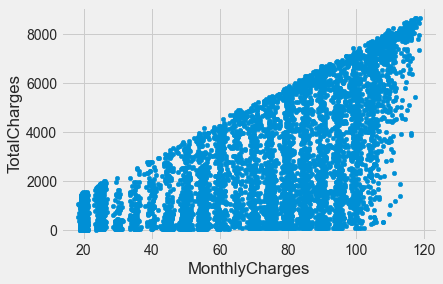

In [21]:
dt[['MonthlyCharges','TotalCharges']].plot.scatter(x= 'MonthlyCharges', y = 'TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

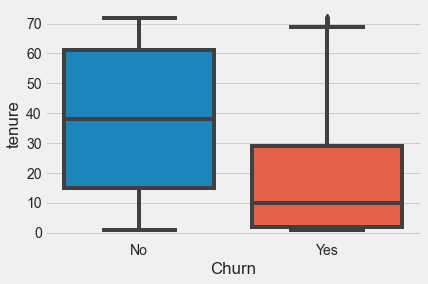

In [22]:
sns.boxplot(x = dt.Churn, y= dt.tenure)

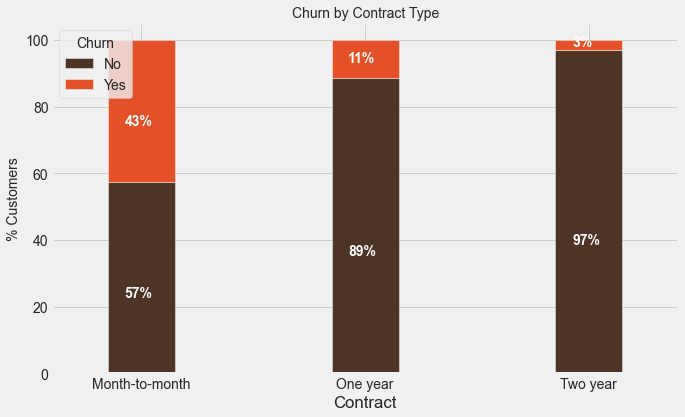

In [23]:
colors = ['#4D3425', '#E45128'] 
contract_churn =  dt.groupby(['Contract', 'Churn']).size().unstack()

ax = (contract_churn. T* 100.0/contract_churn. T. sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize  = (10,6),color  = colors)

ax.legend(loc='best', prop={'size':14}, title = 'Churn') 
ax.set_ylabel('% Customers', size = 14)

ax.set_title('Churn by Contract Type', size = 14)

#Code to add the data Labels on the stacked bar chart

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25* width, p.get_y()+.4*height),
                color='white',weight ='bold', size = 14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

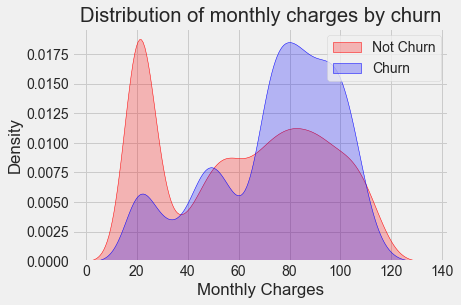

In [24]:
ax = sns.kdeplot(dt.MonthlyCharges [(dt["Churn"] == 'No') ],
      color= "Red", shade = True) 
ax = sns.kdeplot(dt.MonthlyCharges[(dt["Churn"] == 'Yes')],
         ax =ax, color="Blue", shade= True) 
ax.legend (["Not Churn", "Churn"],loc='upper right')
ax.set_ylabel('Density') 
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

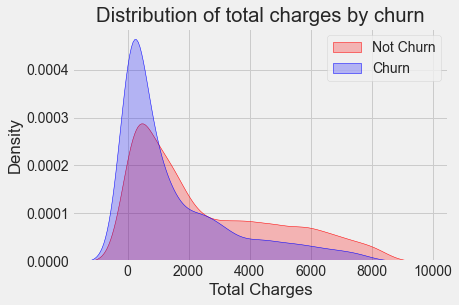

In [25]:
ax = sns.kdeplot(dt.TotalCharges[(dt["Churn"] == 'No') ],
          color="Red", shade = True) 
ax = sns.kdeplot(dt.TotalCharges[(dt["Churn"] == 'Yes') ],
          ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn", "Churn"],loc='upper right')
ax.set_ylabel('Density') 
ax.set_xlabel('Total Charges')
ax.set_title( 'Distribution of total charges by churn')

In [26]:
# EDA done

# Model building


In [27]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])



# scaling variables in the range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


In [28]:
#creating train and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [29]:
#Running Logistic regression model

from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
result = model.fit(X_train, y_train)


In [30]:
from sklearn import metrics 
prediction_test = model.predict(X_test)

#printng the prediction accuracy 

print(metrics.accuracy_score(y_test,prediction_test))

0.8075829383886256


AxesSubplot(0.08,0.07;0.87x0.81)


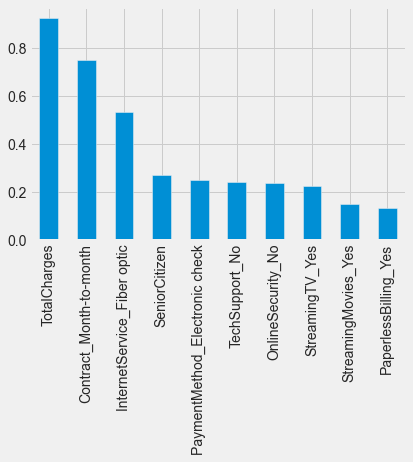

In [31]:
# to get the weights of all the variables

weights = pd.Series(model.coef_[0],index = X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind = 'bar'))

AxesSubplot(0.08,0.07;0.87x0.81)


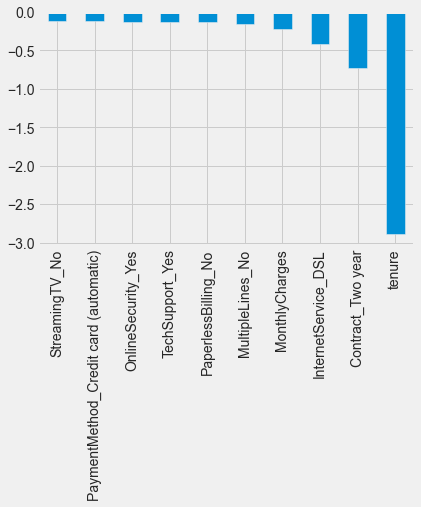

In [32]:
print(weights.sort_values(ascending = False)[-10:].plot(kind = 'bar'))

# Observations

In [33]:
# Random forest


In [34]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 
model_rf = RandomForestClassifier(n_estimators=1000, oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", max_leaf_nodes = 30)

model_rf.fit(X_train, y_train)

# Make predictions

prediction_test = model_rf.predict(X_test) 
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<AxesSubplot:>

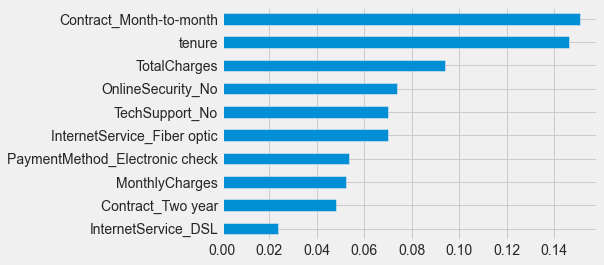

In [35]:
importances = model_rf.feature_importances_
weights  = pd.Series(importances,index = X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [36]:
from sklearn.svm import SVC
model.svm = SVC(kernel = 'linear')
model.svm.fit(X_train, y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test,preds)

0.8073916133617626